In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [3]:
col_names=df.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(df.head())

Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

In [5]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [6]:
print('Shape of the data:')
df.shape

Shape of the data:


(500, 9)

In [7]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

In [8]:
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [10]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


In [11]:
df

,no,gre,toefl,rating,sop,lor,gpa,research,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


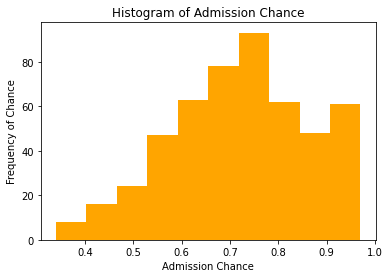

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

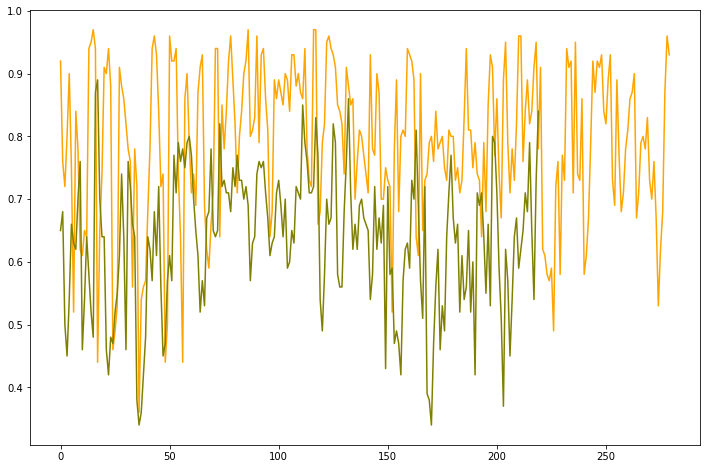

In [13]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance'], color='orange')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance'], color='olive')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


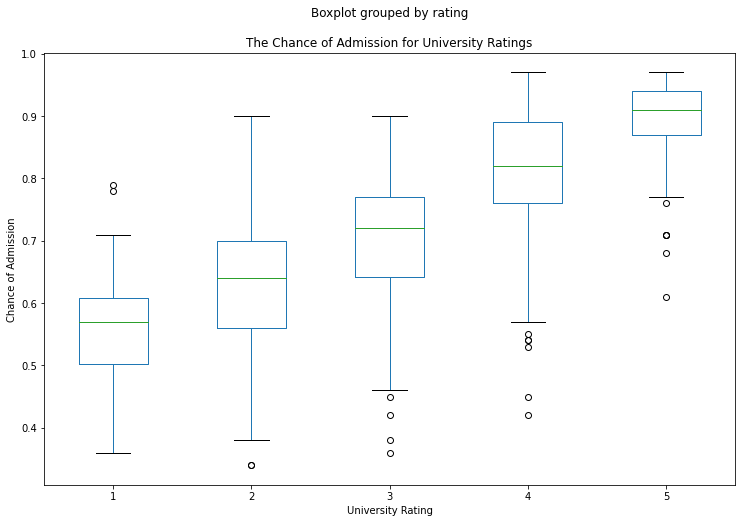

In [14]:
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

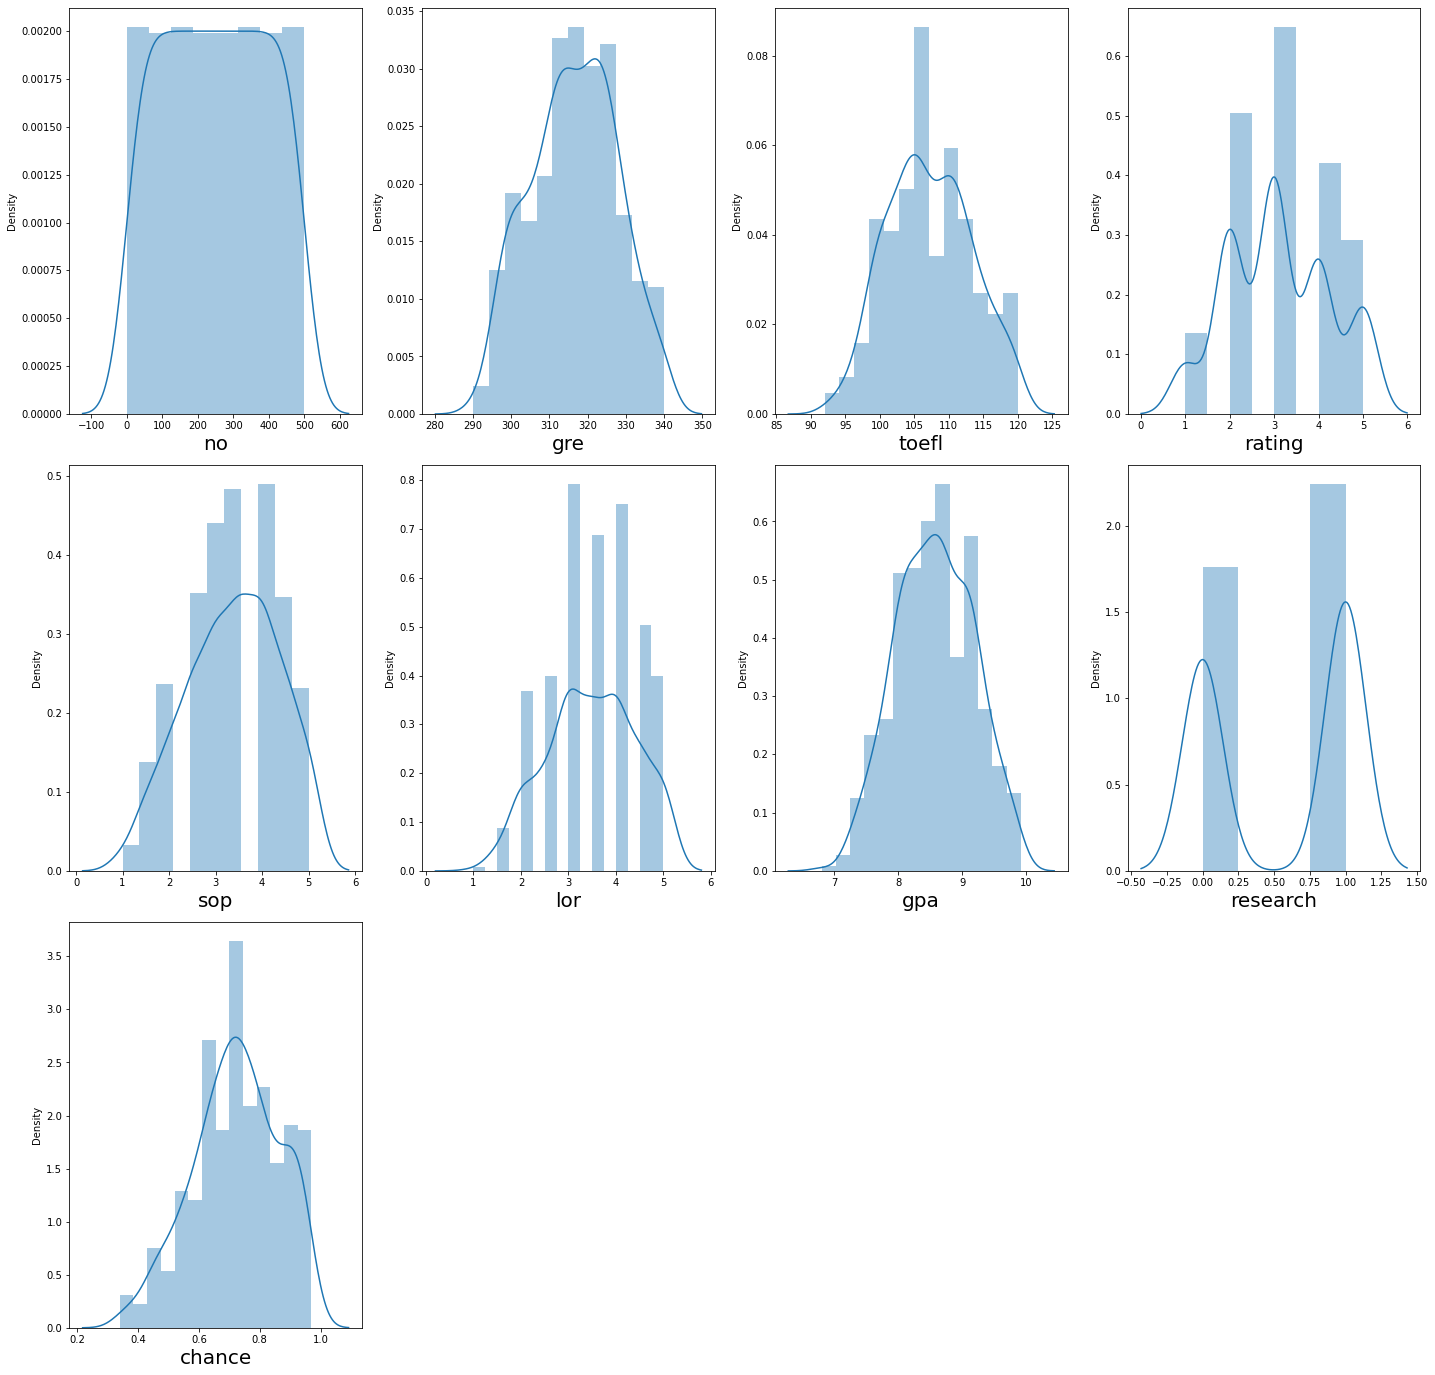

In [15]:
# data distribution on every column in the dataset
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [17]:
df.shape

(500, 9)

In [18]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

In [19]:
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

In [21]:
X = df.drop(["chance"],axis=1)
y = df["chance"].values

In [22]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

In [23]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train,y_train_01)

LogisticRegression()

In [24]:
y_predlogr = logr.predict(x_test)

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.93


In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[68  2]
 [ 5 25]]


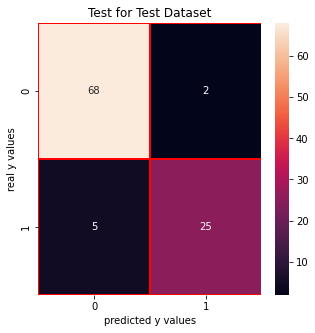

In [27]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9259259259259259
recall_score:  0.8333333333333334
f1_score:  0.8771929824561403


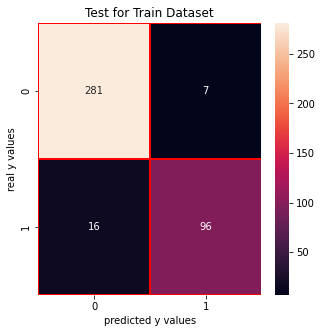

In [29]:
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_01)
y_pred_dtc = dtc.predict(x_test)
print("score: ", dtc.score(x_test,y_test_01))

score:  0.93


In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc

array([[67,  3],
       [ 4, 26]])

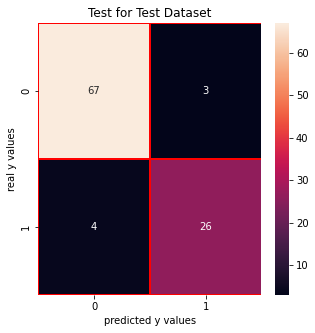

In [32]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_dtc))
print("recall_score: ", recall_score(y_test_01, y_pred_dtc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_dtc))

precision_score:  0.896551724137931
recall_score:  0.8666666666666667
f1_score:  0.8813559322033899


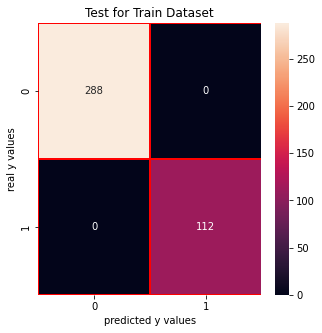

In [34]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [35]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_01)
y_pred_svm = svm.predict(x_test)
print("score: ", svm.score(x_test,y_test_01))

score:  0.93


In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[68,  2],
       [ 5, 25]])

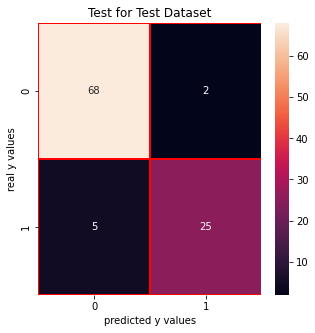

In [37]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [38]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.9259259259259259
recall_score:  0.8333333333333334
f1_score:  0.8771929824561403


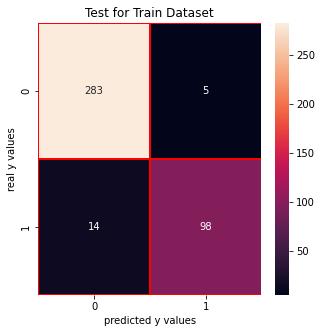

In [39]:
cm_svm_train = confusion_matrix(y_train_01, svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

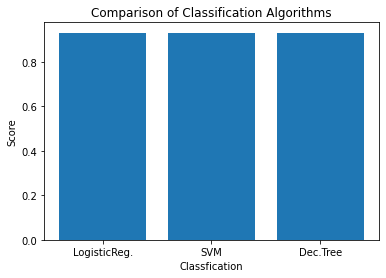

In [40]:
y = np.array([logr.score(x_test, y_test_01), svm.score(x_test, y_test_01), dtc.score(x_test,y_test_01) ])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.", "SVM", "Dec.Tree"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

In [41]:
X = df.drop(['chance'], axis=1)
y = df['chance']

In [42]:
X

,gre,toefl,rating,sop,lor,gpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [43]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['gpa','gre', 'toefl']] = scaler.fit_transform(X[['gpa','gre', 'toefl']])

In [44]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [48]:

from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.8126327365181197 
Linear Regression MSE: 0.00351908697457344, 
Linear Regression RMSE:0.05932189287753249


In [49]:
X_selected = X[['gpa', 'gre', 'toefl']]
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_selected, y, random_state=101)

In [50]:
lr_sel = LinearRegression()
lr_sel.fit(X_sel_train, y_train)
lr_sel_predictions = lr_sel.predict(X_sel_test)

In [51]:

lr_sel_r2 = r2_score(y_test, lr_sel_predictions)
lr_sel_mse = mean_squared_error(y_test, lr_sel_predictions)
lr_sel_rmse = np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7891805958364757 
Linear Regression MSE: 0.003959559452342314, 
Linear Regression RMSE:0.06292503041193


In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.7812698788611929


In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test) 

In [55]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.6175012352409999


In [56]:
#importing regularization models from sklearn library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [57]:
lassocv = LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)
lassocv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=2000000, normalize=True)

In [58]:
lassocv.alpha_

1.1365103998498048e-05

In [59]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=1.1365103998498048e-05)

In [60]:
lasso.score(X_test,y_test)

0.8126311635664673

In [61]:
ridgecv = RidgeCV(alphas=(0.1,1.0,10.0),cv = 10,normalize=True)

In [62]:
ridgecv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [63]:
ridgecv.alpha_

0.1

In [64]:

ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10,normalize=True)
ridgecv.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

RidgeCV(alphas=array([5.46710711, 8.17620941, 8.55904859, 2.64085793, 0.94910662,
       4.88440869, 7.04449839, 0.83398685, 1.44146487, 0.95104819,
       9.5297201 , 6.60893071, 6.29225934, 6.900455  , 3.7915219 ,
       8.33430385, 0.35015147, 0.88076392, 7.64178278, 7.75125713,
       3.88200905, 2.60140835, 1.97856479, 4.33023267, 1.21148596,
       4.64939587, 9.91570962, 6.18332033, 3.05875242, 7.51224406,
       2.23449473, 7.70383022, 7.202348  , 2.08385742, 5.67420956,
       6.30447198, 6.43430788, 5.94534151, 7.28020809, 1.72354857,
       0.83751559, 0.24792907, 2.94684235, 1.78390895, 2.70914247,
       6.47411799, 0.37266153, 9.43299129, 6.76721202, 7.74996228]),
        cv=10, normalize=True)

In [65]:
ridgecv.alpha_

0.2479290652043986

In [66]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=0.2479290652043986)

In [67]:
ridge.score(X_test,y_test)

0.8126354364907571

In [68]:
elasticcv = ElasticNetCV(alphas=None,cv=10)
elasticcv.fit(X_train,y_train)

ElasticNetCV(cv=10)

In [69]:
elasticcv.alpha_

0.0007700056633025155

In [70]:
elasticcv.l1_ratio_

0.5

In [71]:
elastic = ElasticNet(alpha=elasticcv.alpha_,l1_ratio=elasticcv.l1_ratio_)

In [72]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0007700056633025155)

In [73]:
elastic.score(X_test,y_test)

0.8125335075435001

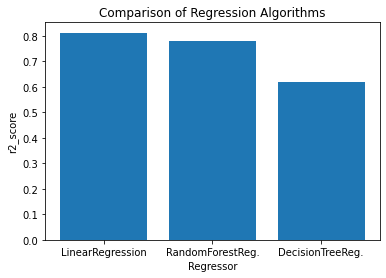

In [74]:
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()